In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
cus=pd.read_csv('customerchurn.csv')
cus.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
cus.shape

(3333, 21)

In [23]:
for col in cus.columns.values:
    print(cus[col].value_counts())

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
VT     73
MI     73
ID     73
UT     72
TX     72
IN     71
MD     70
KS     70
NJ     68
MT     68
NC     68
WA     66
NV     66
CO     66
MS     65
MA     65
RI     65
AZ     64
MO     63
FL     63
ME     62
ND     62
NM     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64
105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: account length, Length: 212, dtype: int64
415    1655
510     840
408     838
Name: area code, dtype: int64
343-7734    1
404-5283    1
391-8087    1
382-1399    1
373-9108    1
           ..
407-9830    1
327-9289    1
345-4551    1
336-1574    1
416-2778    1
Name: phone number, Length: 3333, dtype: int64
no     3010
yes     323
Name: internati

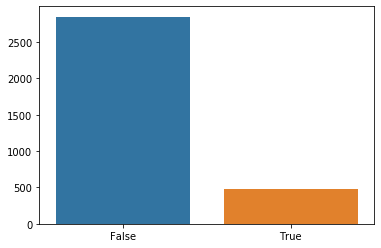

In [4]:
y=cus['churn'].value_counts()
sbn.barplot(y.index,y.values)

In [6]:
cus.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [24]:
cus.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

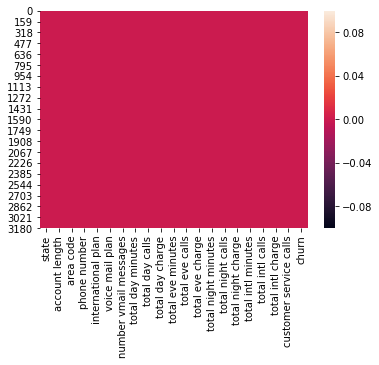

In [25]:
sbn.heatmap(cus.isnull())

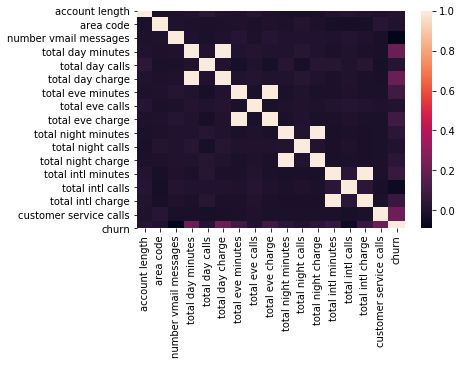

In [26]:
sbn.heatmap(cus.corr())

In [29]:
cus.groupby(['churn']).state.value_counts()

churn  state
False  WV       96
       AL       72
       VA       72
       WI       71
       MN       69
                ..
True   AZ        4
       LA        4
       AK        3
       HI        3
       IA        3
Name: state, Length: 102, dtype: int64

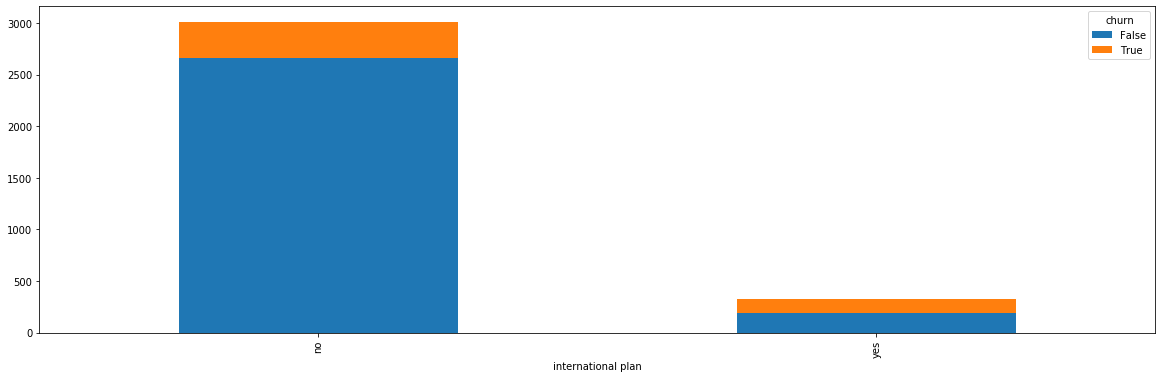

In [14]:
#EDA

cus.groupby(['international plan','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(20,6))

The most of customer churn is happening with who dont have international plan.

The population is more without international plans



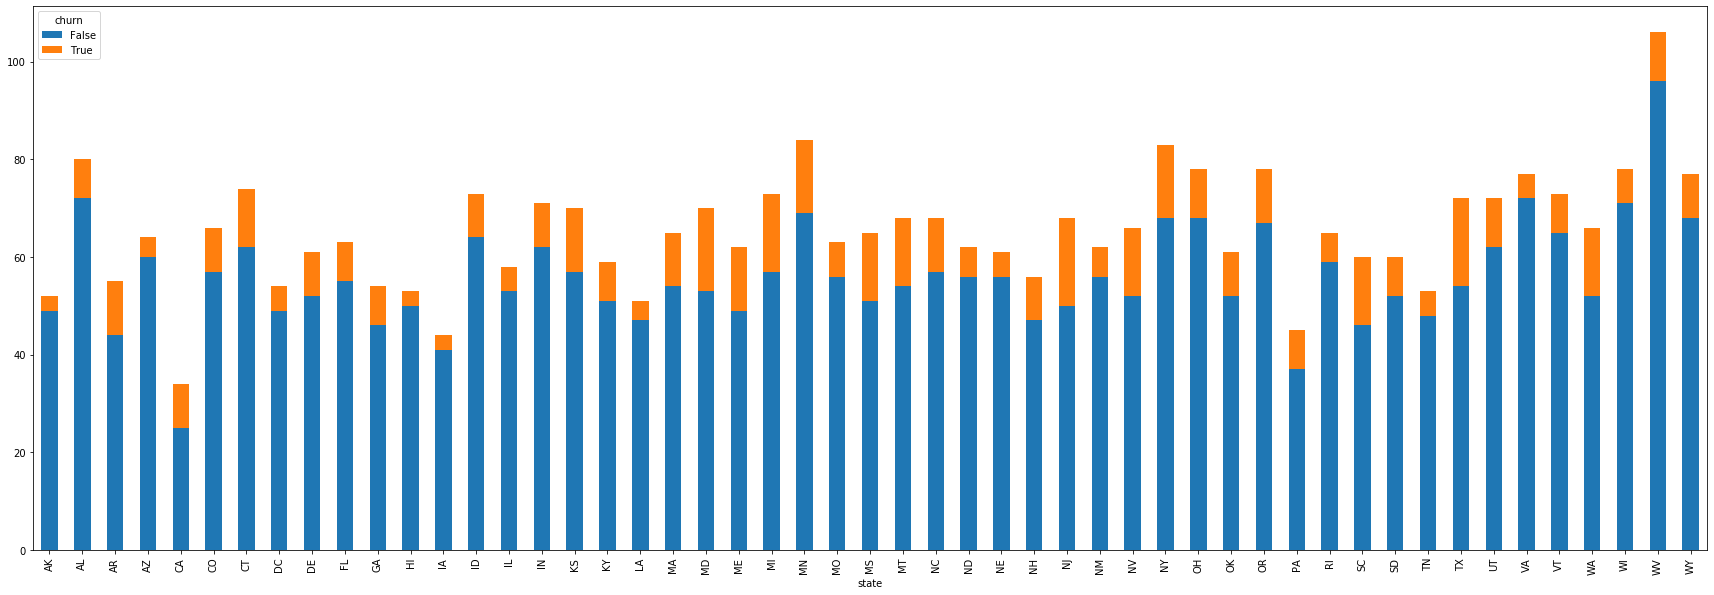

In [15]:
cus.groupby(['state','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))

The above plot shows the churn of customers state wise



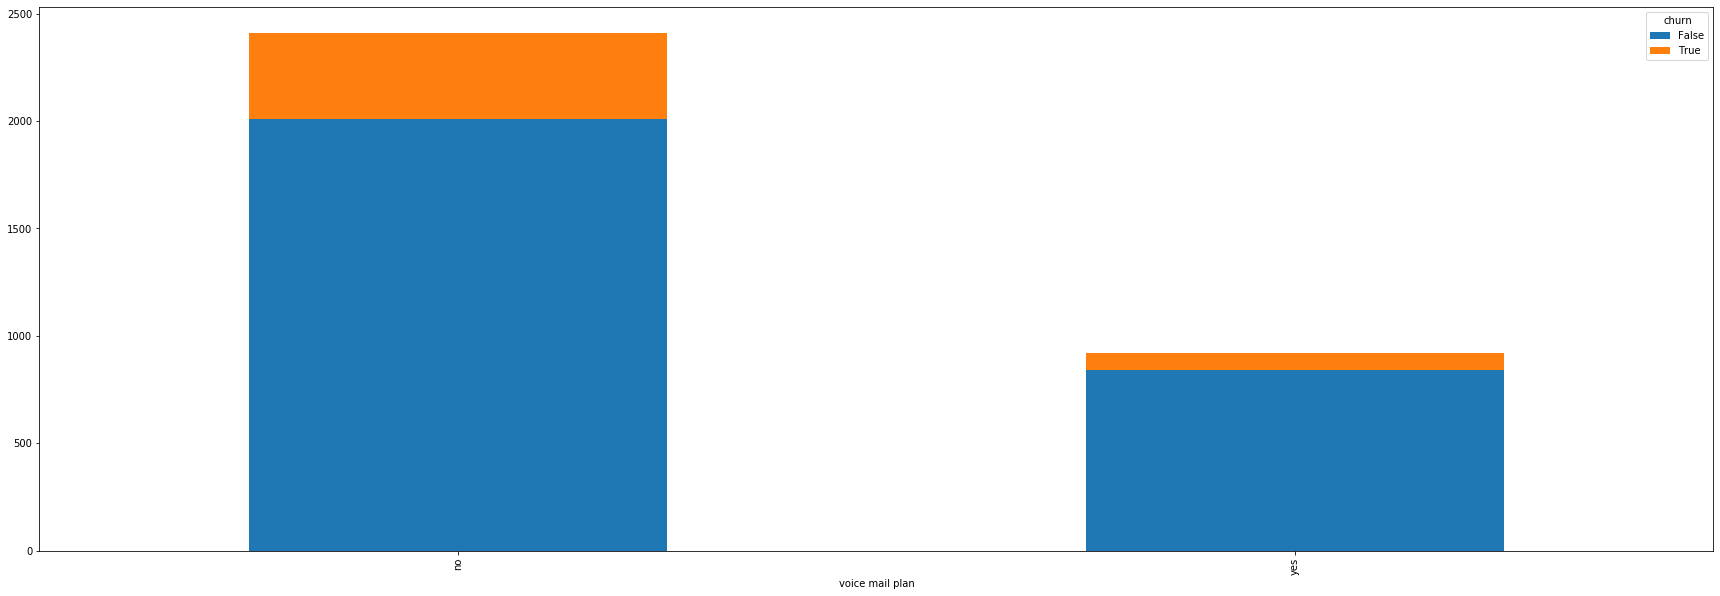

In [16]:
cus.groupby(['voice mail plan','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(30,10))

The customers who doesnt have voice mail are more in churn (yes) category

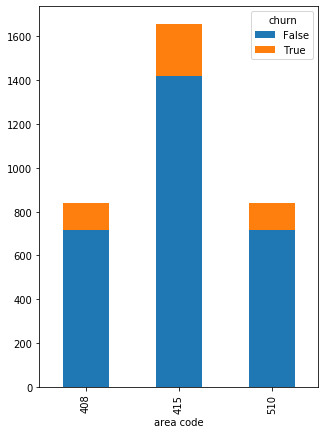

In [19]:
cus.groupby(['area code','churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(5,7))

The above plot shows churn with respect to area code

In [37]:

cust=cus.copy()

In [38]:
cus.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [39]:
#Lets drop the features which are not helpful

cus=cus.drop(['phone number'],axis=1)

In [40]:
cus.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [41]:
#Encoding the categorical variables in the dataset with the help of labelencoder

le=LabelEncoder()
cus['state']=le.fit_transform(cus['state'])
cus['international plan']=le.fit_transform(cus['international plan'])
cus['voice mail plan']=le.fit_transform(cus['voice mail plan'])



In [42]:
cus.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [43]:
#Seperating the features and target variable
x=cus.drop('churn',axis=1)

In [44]:
x.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [45]:
y=pd.DataFrame(data=cus,columns=['churn'])

In [46]:
y.head()

,churn
0,False
1,False
2,False
3,False
4,False


In [51]:
#Encoding the target variable 

y['churn']=le.fit_transform(y['churn'])


In [54]:
y['churn'].unique()

array([0, 1], dtype=int64)

In [60]:
#Bringing down the features to common scale

sc=StandardScaler()
x=sc.fit_transform(x)


In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [66]:
#Selecting the max accuracy,best random state

def accuracy(model,x,y):
    max_acc=0
    for rst in range(40,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=rst,test_size=.22)
        model.fit(x_train,y_train)
        predy=model.predict(x_test)
        acc=accuracy_score(y_test,predy)
        print('Accuracy is',acc,'for the random state',rst)
        if acc>max_acc:
            max_acc=acc
            f_rst=rst
    print('Maximum accuracy is ',max_acc,'and acquired at',f_rst)
    return f_rst

In [67]:
lor=LogisticRegression()
accuracy(lor,x,y)

Accuracy is 0.8746594005449592 for the random state 40
Accuracy is 0.8528610354223434 for the random state 41
Accuracy is 0.8555858310626703 for the random state 42
Accuracy is 0.8787465940054496 for the random state 43
Accuracy is 0.8664850136239782 for the random state 44
Accuracy is 0.8569482288828338 for the random state 45
Accuracy is 0.8705722070844687 for the random state 46
Accuracy is 0.8760217983651226 for the random state 47
Accuracy is 0.8664850136239782 for the random state 48
Accuracy is 0.8732970027247956 for the random state 49
Accuracy is 0.8501362397820164 for the random state 50
Accuracy is 0.8610354223433242 for the random state 51
Accuracy is 0.8664850136239782 for the random state 52
Accuracy is 0.8542234332425068 for the random state 53
Accuracy is 0.8514986376021798 for the random state 54
Accuracy is 0.8596730245231607 for the random state 55
Accuracy is 0.8732970027247956 for the random state 56
Accuracy is 0.8569482288828338 for the random state 57
Accuracy i

68

In [68]:
dt=DecisionTreeClassifier()
accuracy(dt,x,y)

Accuracy is 0.9223433242506812 for the random state 40
Accuracy is 0.9114441416893733 for the random state 41
Accuracy is 0.9073569482288828 for the random state 42
Accuracy is 0.9237057220708447 for the random state 43
Accuracy is 0.9087193460490464 for the random state 44
Accuracy is 0.9155313351498637 for the random state 45
Accuracy is 0.9250681198910081 for the random state 46
Accuracy is 0.9073569482288828 for the random state 47
Accuracy is 0.9141689373297003 for the random state 48
Accuracy is 0.8991825613079019 for the random state 49
Accuracy is 0.9032697547683923 for the random state 50
Accuracy is 0.9141689373297003 for the random state 51
Accuracy is 0.8896457765667575 for the random state 52
Accuracy is 0.9141689373297003 for the random state 53
Accuracy is 0.9046321525885559 for the random state 54
Accuracy is 0.9237057220708447 for the random state 55
Accuracy is 0.9046321525885559 for the random state 56
Accuracy is 0.9087193460490464 for the random state 57
Accuracy i

86

In [69]:
kn=KNeighborsClassifier(n_neighbors=3)
accuracy(kn,x,y)

Accuracy is 0.8937329700272479 for the random state 40
Accuracy is 0.8746594005449592 for the random state 41
Accuracy is 0.885558583106267 for the random state 42
Accuracy is 0.9087193460490464 for the random state 43
Accuracy is 0.9032697547683923 for the random state 44
Accuracy is 0.8746594005449592 for the random state 45
Accuracy is 0.9128065395095368 for the random state 46
Accuracy is 0.8814713896457765 for the random state 47
Accuracy is 0.885558583106267 for the random state 48
Accuracy is 0.896457765667575 for the random state 49
Accuracy is 0.8787465940054496 for the random state 50
Accuracy is 0.8991825613079019 for the random state 51
Accuracy is 0.8637602179836512 for the random state 52
Accuracy is 0.8896457765667575 for the random state 53
Accuracy is 0.8787465940054496 for the random state 54
Accuracy is 0.8923705722070845 for the random state 55
Accuracy is 0.9128065395095368 for the random state 56
Accuracy is 0.8787465940054496 for the random state 57
Accuracy is 0

71

In [70]:
sv=SVC(kernel='rbf')
accuracy(sv,x,y)

Accuracy is 0.9155313351498637 for the random state 40
Accuracy is 0.9114441416893733 for the random state 41
Accuracy is 0.9209809264305178 for the random state 42
Accuracy is 0.9359673024523161 for the random state 43
Accuracy is 0.9168937329700273 for the random state 44
Accuracy is 0.9087193460490464 for the random state 45
Accuracy is 0.9346049046321526 for the random state 46
Accuracy is 0.9277929155313351 for the random state 47
Accuracy is 0.9264305177111717 for the random state 48
Accuracy is 0.9305177111716622 for the random state 49
Accuracy is 0.9182561307901907 for the random state 50
Accuracy is 0.9100817438692098 for the random state 51
Accuracy is 0.9100817438692098 for the random state 52
Accuracy is 0.9196185286103542 for the random state 53
Accuracy is 0.9073569482288828 for the random state 54
Accuracy is 0.9305177111716622 for the random state 55
Accuracy is 0.9291553133514986 for the random state 56
Accuracy is 0.9141689373297003 for the random state 57
Accuracy i

71

In [71]:
rf=RandomForestClassifier(n_estimators=5)
accuracy(rf,x,y)

Accuracy is 0.9400544959128065 for the random state 40
Accuracy is 0.9087193460490464 for the random state 41
Accuracy is 0.9264305177111717 for the random state 42
Accuracy is 0.9482288828337875 for the random state 43
Accuracy is 0.9346049046321526 for the random state 44
Accuracy is 0.944141689373297 for the random state 45
Accuracy is 0.9427792915531336 for the random state 46
Accuracy is 0.9386920980926431 for the random state 47
Accuracy is 0.9482288828337875 for the random state 48
Accuracy is 0.9373297002724795 for the random state 49
Accuracy is 0.9386920980926431 for the random state 50
Accuracy is 0.9332425068119891 for the random state 51
Accuracy is 0.9209809264305178 for the random state 52
Accuracy is 0.94141689373297 for the random state 53
Accuracy is 0.9223433242506812 for the random state 54
Accuracy is 0.9400544959128065 for the random state 55
Accuracy is 0.9400544959128065 for the random state 56
Accuracy is 0.9209809264305178 for the random state 57
Accuracy is 0

60

In [72]:
cvs=cross_val_score(rf,x,y,cv=5,scoring='accuracy')
print('mean accuracy of logistic regression is ',cvs.mean())
print('Standard deviation of the model is ',cvs.std())


mean accuracy of logistic regression is  0.9391011701356529
Standard deviation of the model is  0.01160608246777212


In [73]:
#Fitting the best model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60,test_size=.22)
rf.fit(x_train,y_train)
predy=rf.predict(x_test)
acc=accuracy_score(y_test,predy)
print('Accuracy is ',accuracy_score(y_test,predy))
print('Confusion matrix for the model',confusion_matrix(y_test,predy))
print('Classification report',classification_report(y_test,predy))

Accuracy is  0.9455040871934605
Confusion matrix for the model [[622  15]
 [ 25  72]]
Classification report               precision    recall  f1-score   support

           0       0.96      0.98      0.97       637
           1       0.83      0.74      0.78        97

    accuracy                           0.95       734
   macro avg       0.89      0.86      0.88       734
weighted avg       0.94      0.95      0.94       734



In [75]:
#Saving predictions and the model
pdict=pd.DataFrame(predy,columns=['churn'])
pdict=pdict.to_csv('customerchurnpredictions.csv',index=False)

In [76]:
#Saving the model
import joblib
joblib.dump(rf,'custchurnpredict.pkl')

['custchurnpredict.pkl']